## Data loading - YLFW Benchmark
Source: https://github.com/JessyFrish/YLFW_Links?tab=readme-ov-file

Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [46]:
# Load packages

# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data 
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model



### Descriptive analysis of data

#### Data concatenation

In [47]:
## Create dataframe 

# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
genders = []
ages = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'YLFW_bench/data_p2')
for ethnicity in ethnicities_list:
    ethnicity_col = ethnicity.split('_')[0]
    ethnicity_dir = os.path.join(raw_data_path + 'YLFW_bench/data_p2', ethnicity)
    if os.path.isdir(ethnicity_dir):
        # Iterate through image files in the ethnicity directory
        for img_name in os.listdir(ethnicity_dir):            
            # Append image characteristics to lists
            img_names.append(img_name[:-4])
            ethnicities.append(ethnicity_col)


# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,img_name,ethnicity
0,Asian_14_84,Asian
1,Asian_14_19,Asian
2,Asian_14_33,Asian
3,Asian_14_6,Asian
4,Asian_14_12,Asian


In [48]:
# Read the JSON file into a JSON variable
with open('../data/raw/age_estimation/output_data_precroped_all_age.json', 'r') as file:
    json_data = json.load(file)
    
# Convert the JSON data to a DataFrame
age_df = pd.DataFrame.from_dict(json_data, orient='index', columns=['Age'])
# Convert the 'Age' column to numeric
age_df['Age'] = pd.to_numeric(age_df['Age'])
age_df.reset_index(inplace=True)
age_df.columns = ['img_name', 'Age']

age_df.head()


,img_name,Age
0,Caucasian_1008_18,8.0
1,Asian_225_72,11.0
2,Asian_238_1,3.0
3,Caucasian_1110_17,4.0
4,Caucasian_364_12,2.0


In [49]:
# Concatenate dataframes
final_df = pd.merge(age_df, df, on='img_name', how='inner')
final_df.head()

,img_name,Age,ethnicity
0,Caucasian_604_4,1.0,Caucasian
1,Asian_386_43,9.0,Asian
2,Indian_98_12,4.0,Indian
3,Asian_386_2,9.0,Asian
4,Caucasian_204_1,1.0,Caucasian


#### Data distributions
(Evt efter age groups)

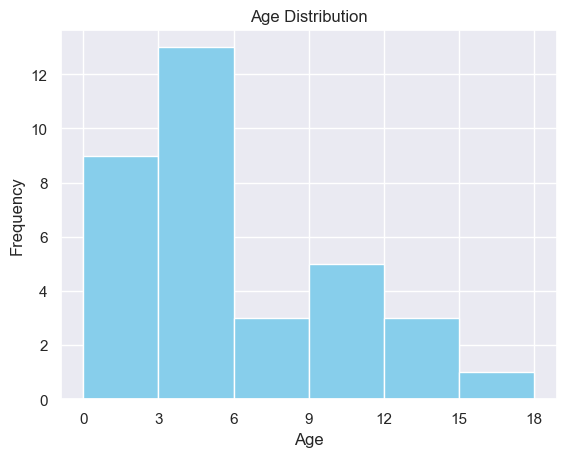

In [65]:
# Define bin edges for each group of 3 years
bin_edges = [0, 3, 6, 9, 12, 15, 18]
plt.hist(final_df['Age'], bins=bin_edges, color='skyblue')
plt.xticks(bin_edges)
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

